# Part 1
The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

#Problem 1.1 :
Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

Location  	      |   No. of Restaurants
-------------------------------------------
Delhi-NCR             |       7947
Rest Of India         |        705


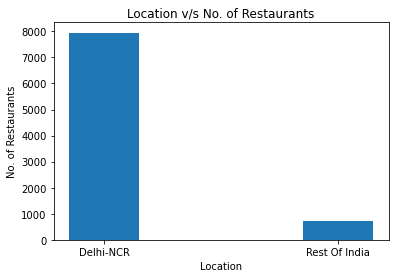

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

#getting data of India
df = df[df["Country Code"]==1]

city_dict = {}
city = df["City"].value_counts().index
num = df["City"].value_counts().values

#getting details of cities as per Delhi-NCR and rest of India
for i in range(len(city)):
    if city[i]=="New Delhi" or city[i]=="Ghaziabad" or city[i]=="Noida" or city[i]=="Gurgaon" or city[i]=="Faridabad":
        city_dict["Delhi-NCR"] = city_dict.get("Delhi-NCR",0) + num[i]
    else:
        city_dict["Rest Of India"] = city_dict.get("Rest Of India",0) + num[i]

res_loc = ["Delhi-NCR","Rest Of India"]
res_num = [city_dict["Delhi-NCR"],city_dict["Rest Of India"]]

#printing the output
print("Location  \t      |   No. of Restaurants")
print("-------------------------------------------")
for i in range(len(res_loc)):
    print('{:<22s}|{:>11d}'.format(res_loc[i],res_num[i]))

#plotting
plt.bar(res_loc,res_num,width=0.3)
plt.xlabel("Location")
plt.ylabel("No. of Restaurants")
plt.title("Location v/s No. of Restaurants")
plt.show()

#Problem 1.2 :
Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#reading the csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")
#copying the data
df = d.copy()
#getting data of India
df = df[df["Country Code"]==1]

#creating numpy array for cities and cuisines
cities = np.array(df["City"])
cuisines = np.array(df["Cuisines"])

#getting sets to avoid duplicates
ncr = set()
roi = set()
for i in range(len(cities)):
    if cities[i]=="New Delhi" or cities[i]=="Ghaziabad" or cities[i]=="Noida" or cities[i]=="Gurgaon" or cities[i]=="Faridabad":
        for cui in cuisines[i].split(", "):
            ncr.add(cui)
    else:
        for cui in cuisines[i].split(", "):
            roi.add(cui)
not_in_delhi_ncr = []    
#printing the results
for i in roi:
    if i not in ncr:
        not_in_delhi_ncr.append(i)
        print(i)

German
BBQ
Malwani
Cajun


Using zomato api

In [46]:
import requests
import json
params={"user-key":"273cafab78fd2157520f834cce7099f5", "city_id":1}
headers={"accept":"application/json", "user-key":"273cafab78fd2157520f834cce7099f5"}
response=requests.get('https://developers.zomato.com/api/v2.1/cuisines', params=params, headers=headers)
data=response.json()

cuisines_from_api_in_delhi=[]

for i in data['cuisines']:
    cuisines_from_api_in_delhi.append(i['cuisine']['cuisine_name'])
    
cuisines_from_api_in_delhi=set(cuisines_from_api_in_delhi)

for i in cuisines_from_api_in_delhi:
    if i in not_in_delhi_ncr:
        print(i)

BBQ


Conclusion : Dataset is incomplete because 'BBQ' and 'Malwani' Cuisines are served in Delhi-NCR .

#Problem 1.3 :
Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

TOP 10 CUISINES IN Delhi-NCR
-----------------------------
North Indian          |       3597
Chinese               |       2448
Fast Food             |       1866
Mughlai               |        933
Bakery                |        697
South Indian          |        569
Continental           |        547
Desserts              |        542
Street Food           |        538
Italian               |        535

TOP 10 CUISINES IN Rest of India
-----------------------------
North Indian          |        349
Chinese               |        242
Continental           |        177
Italian               |        147
Cafe                  |        136
Fast Food             |         97
South Indian          |         62
Mughlai               |         59
Desserts              |         55
Mexican               |         50


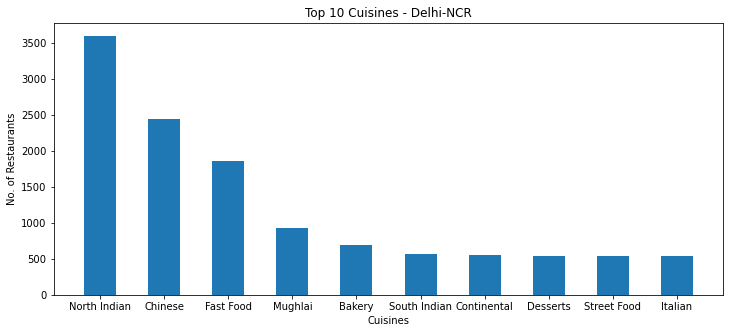

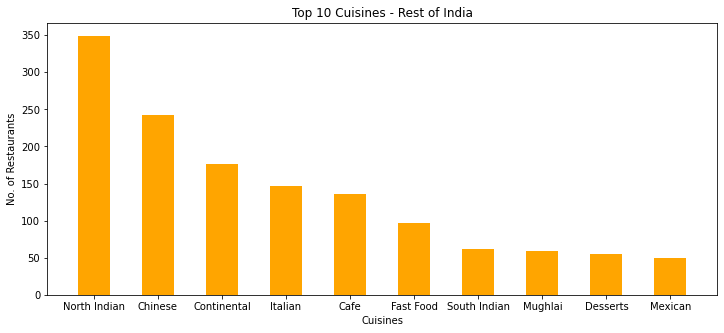

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#readin csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")
#copying data
df = d.copy()
#getting data of India
df = df[df["Country Code"]==1]
#creating numpy array for cities and cuisines
cities = np.array(df["City"])
cuisines = np.array(df["Cuisines"])


ncr = {}
roi = {}
for i in range(len(cities)):
    if cities[i]=="New Delhi" or cities[i]=="Ghaziabad" or cities[i]=="Noida" or cities[i]=="Gurgaon" or cities[i]=="Faridabad":
        for cui in cuisines[i].split(", "):
            ncr[cui] = ncr.get(cui,0) + 1
    else:
        for cui in cuisines[i].split(", "):
            roi[cui] = roi.get(cui,0) + 1
            
#creating dictionary for cuisines in ncr and number of restaurants
ncr_cui = []
ncr_num = []
print("TOP 10 CUISINES IN Delhi-NCR")
print("-----------------------------")
for i in range(1,11):
    m=max(ncr.values())
    for j in ncr:
        if ncr[j]==m:
            ncr_cui.append(j)
            ncr_num.append(ncr[j])
            break
    del ncr[j]
for i in range(len(ncr_cui)):
    print('{:<22s}|{:>11d}'.format(ncr_cui[i],ncr_num[i]))    
print()

#creating dictionary for cuisines in rest of India and number of restaurants
roi_cui = []
roi_num = []
print("TOP 10 CUISINES IN Rest of India")
print("-----------------------------")
for i in range(1,11):
    m=max(roi.values())
    for j in roi:
        if roi[j]==m:
            roi_cui.append(j)
            roi_num.append(roi[j])
            break
    del roi[j]
for i in range(len(roi_cui)):
    print('{:<22s}|{:>11d}'.format(roi_cui[i],roi_num[i]))
 

 #plotting
plt.subplots(figsize=(12,5))
plt.bar(ncr_cui,ncr_num,width=0.5)
plt.xlabel("Cuisines")
plt.ylabel("No. of Restaurants")
plt.title("Top 10 Cuisines - Delhi-NCR")
plt.show()

plt.subplots(figsize=(12,5))
plt.bar(roi_cui,roi_num,width=0.5,color="orange")
plt.xlabel("Cuisines")
plt.ylabel("No. of Restaurants")
plt.title("Top 10 Cuisines - Rest of India")
plt.show()

#Problem 1.4 :
Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

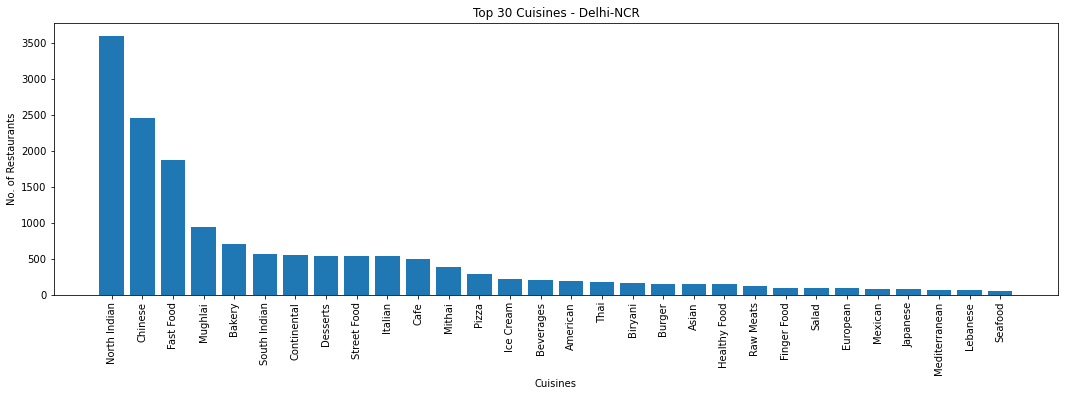

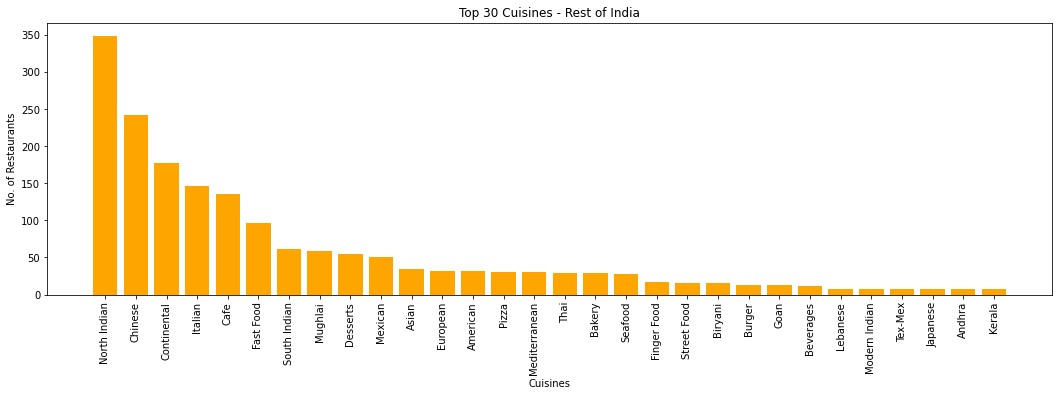

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

#getting data of India
df = df[df["Country Code"]==1]

#creating numpy arrays for cities and cuisines
cities = np.array(df["City"])
cuisines = np.array(df["Cuisines"])


ncr = {}
roi = {}

for i in range(len(cities)):
    if cities[i]=="New Delhi" or cities[i]=="Ghaziabad" or cities[i]=="Noida" or cities[i]=="Gurgaon" or cities[i]=="Faridabad":
        for cui in cuisines[i].split(", "):
            ncr[cui] = ncr.get(cui,0) + 1
    else:
        for cui in cuisines[i].split(", "):
            roi[cui] = roi.get(cui,0) + 1

ncr_cui = []
ncr_num = []

for i in range(30):
    m=max(ncr.values())
    for j in ncr:
        if ncr[j]==m:
            ncr_cui.append(j)
            ncr_num.append(ncr[j])
            break
    del ncr[j]

roi_cui = []
roi_num = []

for i in range(30):
    m=max(roi.values())
    for j in roi:
        if roi[j]==m:
            roi_cui.append(j)
            roi_num.append(roi[j])
            break
    del roi[j]
 

 #plotting
plt.subplots(figsize=(18,5))
plt.bar(ncr_cui,ncr_num,width=0.8,)
plt.xlabel("Cuisines")
plt.xticks(rotation=90)
plt.ylabel("No. of Restaurants")
plt.title("Top 30 Cuisines - Delhi-NCR")
plt.show()

plt.subplots(figsize=(18,5))
plt.bar(roi_cui,roi_num,width=0.8,color="orange")
plt.xlabel("Cuisines")
plt.xticks(rotation=90)
plt.ylabel("No. of Restaurants")
plt.title("Top 30 Cuisines - Rest of India")
plt.show()

# Part 2
User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

#Problem 2.1 :
Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

#Problem 2.1.1 :
Number of Votes given Restaurant

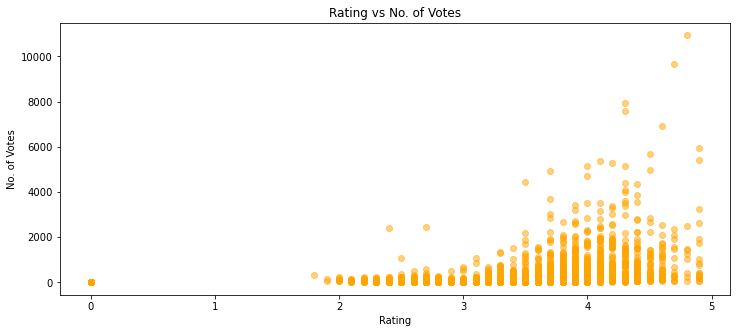

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

#getting data of India
df = df[df["Country Code"]==1]

rating = np.array(df["Aggregate rating"])
votes = np.array(df["Votes"])

plt.subplots(figsize=(12,5))
plt.scatter(rating,votes,alpha=0.5,c="orange")
plt.xlabel("Rating")
plt.ylabel("No. of Votes")
plt.title("Rating vs No. of Votes")
plt.show()

Inference :
The rating is between or below 3.5 and 4.5 if the votes are below or equal to 1000. We then see that as the rating increases , there is increase in number of votes. The highest rating is given by Votes that are 1400.

#Problem 2.1.2 :
Restaurant serving more number of cuisines.

No of cuisines served |   No. of restaurants serving given number of cuisines
-----------------------------------------------------------------------------
2                     |       3144
1                     |       3097
3                     |       1596
4                     |        552
5                     |        155
6                     |         70
7                     |         26
8                     |         12


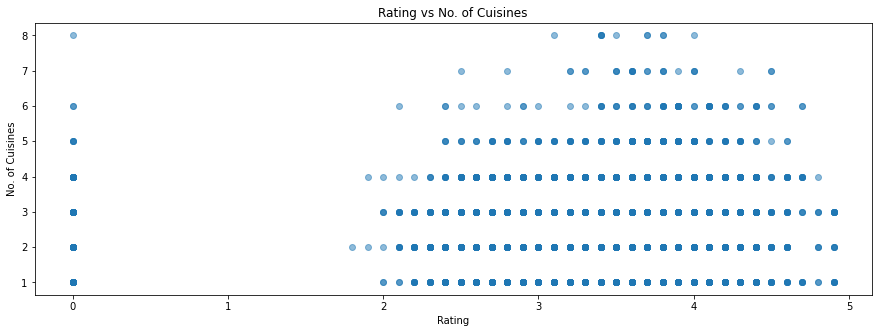

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

#getting data of India
df = df[df["Country Code"]==1]

cuisines = df["Cuisines"].values
cuisines_num = []
for i in cuisines:
    cuisines_num.append(len(i.split(", ")))
df["num_cuisines"] = cuisines_num

rating = np.array(df["Aggregate rating"],dtype=float)
num_cuisine = np.array(df["num_cuisines"])

num_dict={}
for i in num_cuisine:
    num_dict[i] = num_dict.get(i,0)+1
print("No of cuisines served |   No. of restaurants serving given number of cuisines")
print("-----------------------------------------------------------------------------")    
for i in num_dict.keys():
    print('{:<22d}|{:>11d}'.format(i,num_dict[i]))
    
plt.subplots(figsize=(15,5))
plt.scatter(rating,num_cuisine, alpha=0.5)
plt.xlabel("Rating")
plt.ylabel("No. of Cuisines")
plt.title("Rating vs No. of Cuisines")
plt.show()


Inference :
From the graph we see that as the number of cuisines increases the rating seems to increase steeply linearly upto 4 cuisines. From 4-6 number of cuisines the ratings increase less steeply(with lesser slope). For 6-7 number of cuisines the rating remain almost constant but decreases as the number of cuisines reaches 8.

#Problem 2.1.3 :
Average Cost of Restaurant

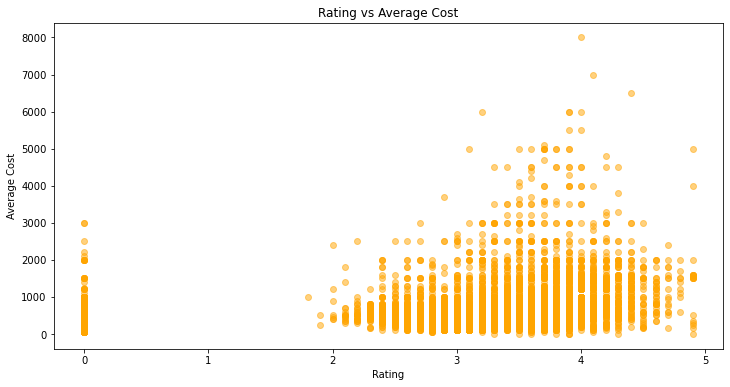

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

#getting data of India
df = df[df["Country Code"]==1]

rating = np.array(df["Aggregate rating"])
avg_cost = np.array(df["Average Cost for two"])

plt.subplots(figsize=(12,6))
plt.scatter(rating,avg_cost,c="orange",alpha=0.5)
plt.xlabel("Rating")
plt.ylabel("Average Cost")
plt.title("Rating vs Average Cost")
plt.show()


Inference :
The rating is increasing drastically when cost increases from 0 to 1000. Then the rating increases gradually. This shows that there is an overall increase in the rating if the average cost increases.

#Problem 2.1.4 :
Restaurant serving some specific cuisines.

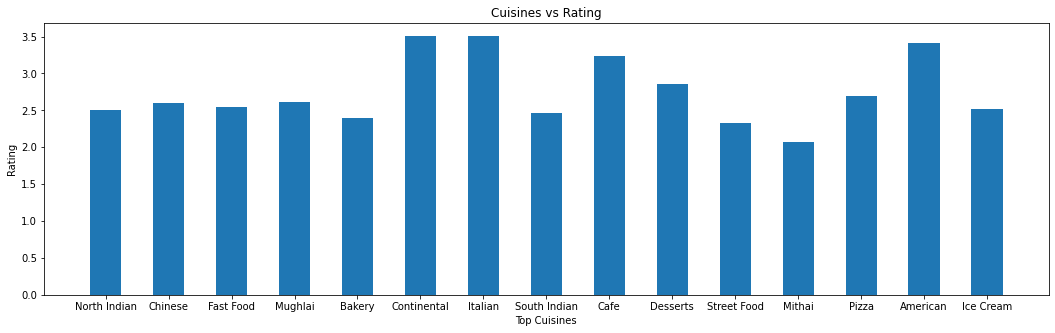

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

#getting data of India
df = df[df["Country Code"]==1]

rating = np.array(df["Aggregate rating"])
cuisines = np.array(df["Cuisines"])

cui_dict = {}

for i in range(len(cuisines)):
    for cui in cuisines[i].split(", "):
        cui_dict[cui] = cui_dict.get(cui,0) + 1
        
top_cuisines = []
for i in range(15):
    m=max(cui_dict.values())
    for j in cui_dict:
        if cui_dict[j]==m:
            top_cuisines.append(j)
            break
    del cui_dict[j]    
    
avg_rating = []    
for i in top_cuisines:
    sum=0
    count=0
    for j in range(len(rating)):
        if i in cuisines[j]:
            sum += rating[j]
            count+=1
    avg_rating.append(sum/count)
    
    
plt.subplots(figsize=(18,5))
plt.bar(top_cuisines,avg_rating,width=0.5)
plt.xlabel("Top Cuisines")
plt.ylabel("Rating")
plt.title("Cuisines vs Rating")
plt.show()

#Problem 2.2 :
Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

Connaught Place
Rajouri Garden
Shahdara
Defence Colony
Pitampura
Malviya Nagar
Mayur Vihar Phase 1
Rajinder Nagar
Safdarjung
Satyaniketan


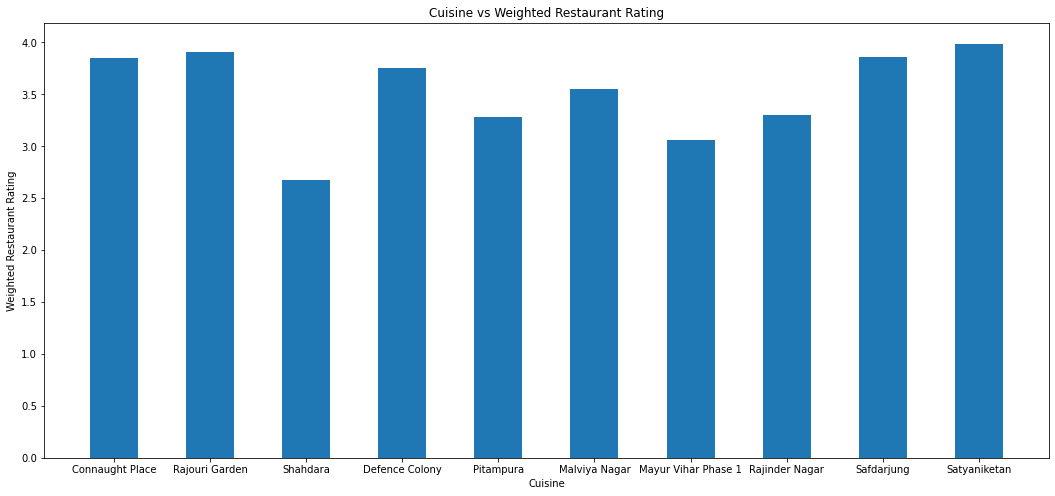

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

#getting data of India
df = df[df["Country Code"]==1]


data=list(zip(df['Locality'],df['Aggregate rating'],df['Votes']))
index=0
values=df['Locality'].value_counts().values
for i in range(len(values)):
    if values[i]<50:
        index=i-1
        break
locality_list=df['Locality'].value_counts().index[0:index]
weightage_rating=[]
for locality in locality_list:
    NRate=0
    Tvote=0
    for i in range(len(data)):
        if locality in data[i][0]:
            NRate=NRate+(data[i][1]*data[i][2])
            Tvote=Tvote+data[i][2]
    if Tvote!=0:       
        weightage_rating.append(NRate/Tvote) 
    else:
        weightage_rating.append(0)
        
for i in locality_list[0:10]:
    print(i)
plt.figure(figsize=(18, 8))
plt.bar(locality_list[0:10],weightage_rating[0:10],width=0.5)
plt.xlabel("Cuisine")
plt.ylabel("Weighted Restaurant Rating")
plt.title("Cuisine vs Weighted Restaurant Rating")
plt.show()


Inference :
The weighted restaurant rating of top ten localities seems to be almost the same. The height of the bars are only gradually decreasing.

# Part 3 : 
Visualization


#Problem 3.1 :
Plot the bar graph top 15 restaurants have a maximum number of outlets.

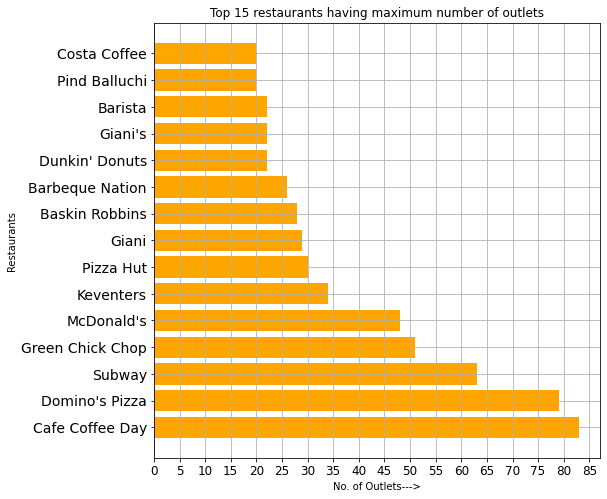

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

res_dict = {}
#created a dictionary which will contain the frequencies of all the restaurants
for i in df['Restaurant Name']:
    if i in res_dict.keys():
        res_dict[i]+=1
    else:
        res_dict[i]=1
        
res = []
res_num = []
for i in range(15):
    m=max(res_dict.values())
    for j in res_dict:
        if res_dict[j]==m:
            res.append(j)
            res_num.append(res_dict[j])
            break
    del res_dict[j]
    
plt.figure(figsize=(8, 8))
plt.barh(res, res_num, color='orange')
plt.grid()
plt.ylabel('Restaurants')
plt.xlabel('No. of Outlets--->')
plt.title('Top 15 restaurants having maximum number of outlets')
plt.xticks(np.arange(0, 90, 5), size=12)
plt.yticks(size=14)
plt.show()

Inference :
From the graph we see that there is a gradual decrease in number of outlets. Cafe Coffee Day has the maximum number of outlets. Costa Coffee has the lowest number of outlets among the top 15 restaurants.

#Problem 3.2 :
Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant)

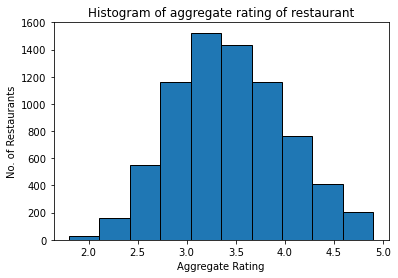

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

#plotting
df=df[df['Aggregate rating']!=0]
plt.hist(df['Aggregate rating'].values,bins=10,edgecolor='black')
plt.title("Histogram of aggregate rating of restaurant")
plt.xlabel("Aggregate Rating")
plt.ylabel("No. of Restaurants")
plt.show()

Inference :
From the graph we infer that most of the restaurants are rated between 2.6 to 3.8 (approx). Maximum rating(5) has been given to less number of restaurants. There are less number of restaurants in the low rating range either.

#Problem 3.3 :
Plot the bar graph top 10 restaurants in the data with the highest number of votes.

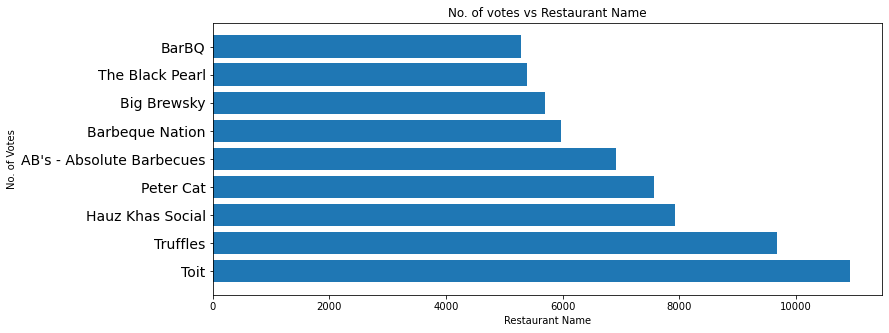

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()


max_votes=df.Votes.sort_values(ascending=False).head(10).values
res_name = []
for i in range(len(max_votes)):
    res_name.append(df[df["Votes"]==max_votes[i]]["Restaurant Name"].values[0])

#plotting
plt.subplots(figsize=(12,5))
plt.barh(res_name,max_votes)
plt.xlabel("Restaurant Name")
plt.ylabel("No. of Votes")
plt.yticks(size=14)
plt.title("No. of votes vs Restaurant Name")
plt.show()

Inference :
From the graph we infer that Toit is the most voted restaurant in India with 10934 votes.

#Problem 3.4 :
Plot the pie graph of top 10 cuisines present in restaurants in the USA.

***Top 10 cuisines present in restaurants in the USA**********
American 112
Seafood 59
Burger 49
Sandwich 49
Pizza 49
Steak 42
Italian 38
Breakfast 37
Mexican 36
Sushi 34


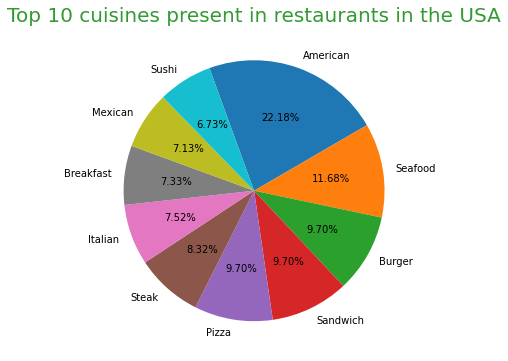

In [58]:
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==216]
df.dropna(subset=['Cuisines'],inplace=True)
cuisines_usa = df['Cuisines'].str.split(', ')
cuisines = []
for i in cuisines_usa:
    cuisines.extend(i)
    
dct = {}
for i in cuisines:
    dct[i] = dct.get(i,0) + 1
    
key = sorted(dct, key=dct.get, reverse=True)
print('***Top 10 cuisines present in restaurants in the USA**********')
count = []
cuisines_name = []
for i in key[:10]:
    print(i, dct[i])
    count.append(dct[i])
    cuisines_name.append(i)
plt.figure(figsize=(12,6))
plt.pie(count,labels=cuisines_name,autopct='%0.2f%%',counterclock=False,startangle=110)
plt.title('Top 10 cuisines present in restaurants in the USA',fontsize=20, color='green',alpha=0.8)
plt.show()

Inference :
From the graph we infer that American is the most popular cuisines in USA. Seafood, Burger,sandwich are also more popular cuisines in USA.

#Problem 3.5 :
Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

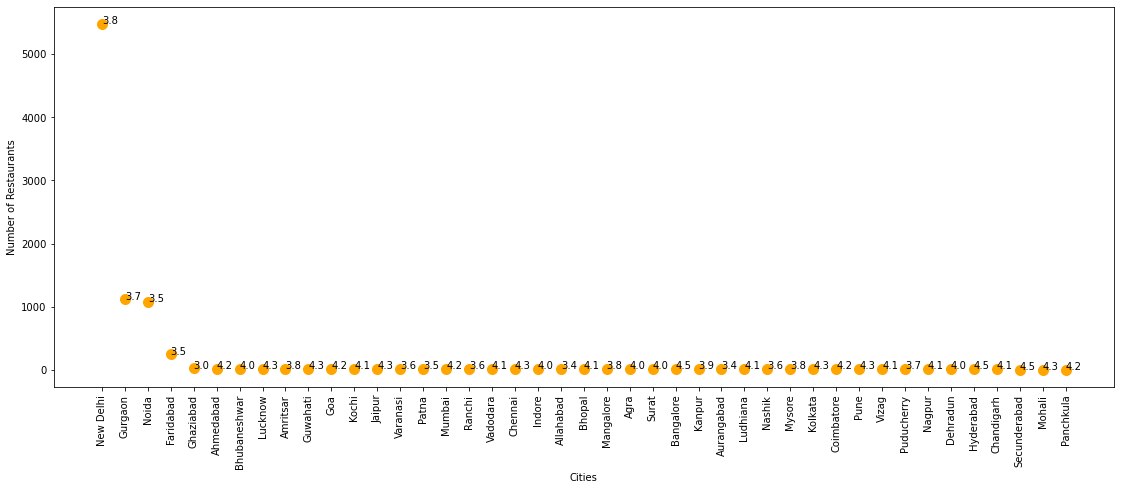

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

locality=[]
ef=df[df['Country Code']==1] # India country data
new=ef.City.value_counts() #city value counts
Weighted_Restaurant_Rating=[]
res_name=new.index # city name as index
no_of_res=new.values #city count as a value
for i in res_name:
    locality.append(i)
    tf=df[df.City==i]
    af=tf.copy()
    af['new_col']=tf['Votes']*tf['Aggregate rating'] #adding new column in data frame 
    total=af.new_col.sum() #sum of all col data
    count=af.Votes.sum() #sum of votes 
    weighted=total/count #weighted restaurant rating for each
    Weighted_Restaurant_Rating.append(weighted)
Weighted_Restaurant_Rating = [ round(elem, 1) for elem in Weighted_Restaurant_Rating]#round of the value of Weighted_Restaurant_Rating
#Plotting Graph
plt.subplots(figsize=(19,7))
plt.scatter(res_name,no_of_res,s=100,color='orange')
plt.xlabel('Cities')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
#pltting the value in th graph.
for i in range(len(Weighted_Restaurant_Rating)):
    plt.text(res_name[i],no_of_res[i],Weighted_Restaurant_Rating[i]) #text value in graph.
plt.show()